In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
#
# All CSVs created from Scala MLib PCA algorithm
#
m_file_prefixes= ['/tmp/total_flow.', '/tmp/occupancy.', '/tmp/speed.']

In [4]:
def set_xaxis(ax, n_x):
    x_ticks_major= []
    x_ticks_minor= []
    x_labels_minor= []
    x_labels_major= []
    m_empty_string= ''
    for i in xrange(n_x):
        m_time_minute= 5 * (i + 1)
        m_minute_string= '{}M'.format(m_time_minute).zfill(5)
        if m_time_minute % 60 == 0:
            m_hour= m_time_minute / 60
            m_hour_string= '{}H'.format(m_hour).zfill(3)
            x_ticks_major.append(float(i))
            x_labels_major.append(m_hour_string)
        else:
            x_ticks_minor.append(float(i))
            x_labels_minor.append(m_minute_string)
    ax.set_xticks(x_ticks_minor, minor=True)
    ax.set_xticks(x_ticks_major, minor=False)
    ax.set_xticklabels(x_labels_major, minor=False, rotation=65)
    ax.grid(True, which='major')

## NOTE: All visualizations against dataset with no standardization

# Mean Vector

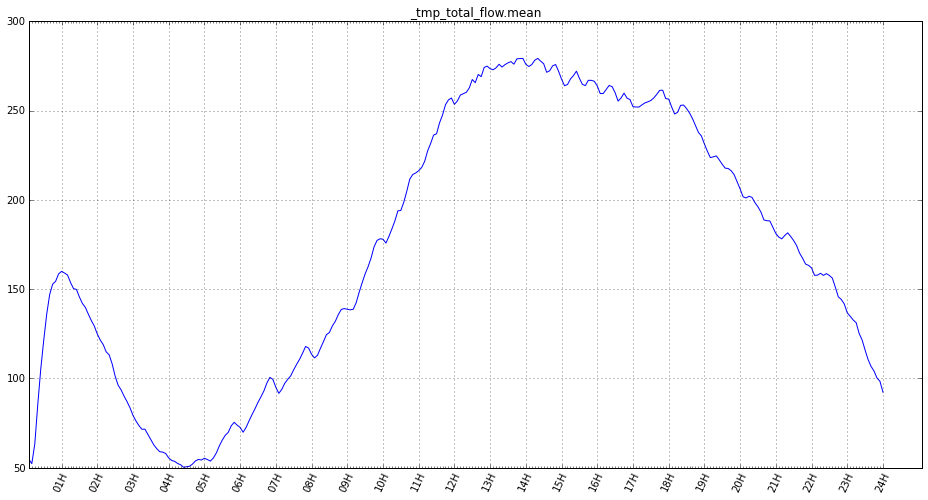

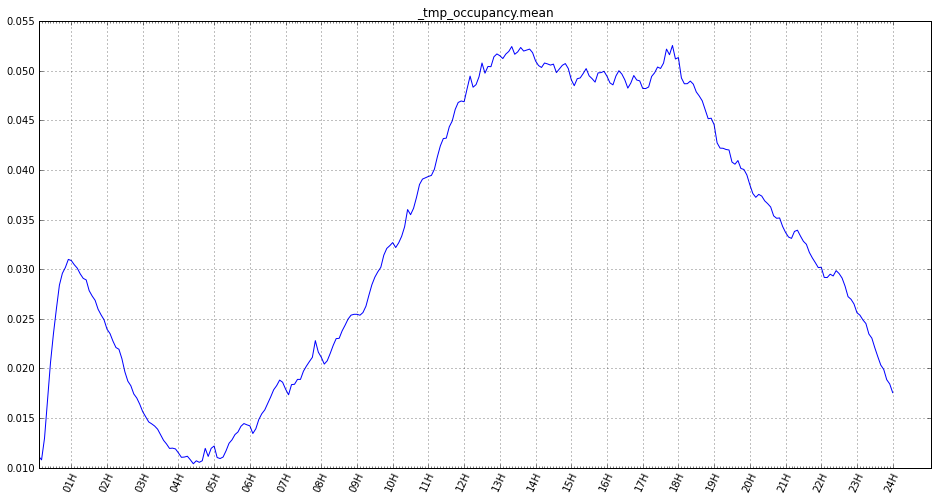

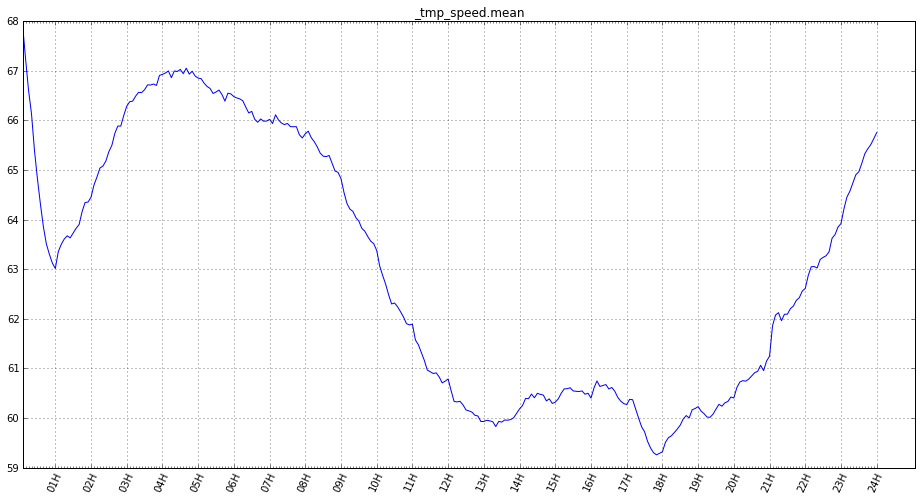

In [5]:
for p in m_file_prefixes:
    fig, ax= plt.subplots(figsize=(16,8))
    m_filename= p + 'mean_vector.01_2010.csv'
    m_mean_vector= pd.read_csv(m_filename, header=None).values[0]
    #
    ax.plot(m_mean_vector)
    #
    m_title= p.replace('/', '_') + 'mean'
    ax.set_title(m_title)
    #
    set_xaxis(ax, len(m_mean_vector))
    #
    m_output_filename= p + 'mean_vector.pdf'
    fig.savefig(m_output_filename)

# Perc. Variance Explained

[0, 0.894763641710425, 0.95891071726004973, 0.97548699257644222, 0.97947061325361395, 0.98231469860478948, 0.98458603385368459, 0.98544323209162787, 0.98624986485308341, 0.98686381766847775, 0.98732942886809716, 0.98777450172891523, 0.98816092990828575, 0.98851567792247408, 0.988845733820644, 0.98915275589684359, 0.98944763312450568, 0.98973260159265319, 0.99001074070377015, 0.9902693242966133, 0.9905244261354228, 0.99076542773888376, 0.99100425215481458, 0.99123124973908605, 0.99144004149439291, 0.99163494701495736, 0.9918264350597934, 0.99201206013004639, 0.99218983514537418, 0.99236577538242987, 0.99253634389292189]
[0, 0.76986465147482341, 0.82760062168473325, 0.86295490202614022, 0.89345691748452694, 0.92033824705046252, 0.93235217536584425, 0.9411127046994453, 0.94588363370294193, 0.95037770795556731, 0.95374452877860783, 0.95652826603013785, 0.9588978764782764, 0.96095105658871971, 0.962843777419641, 0.96465515027505511, 0.96631752750937594, 0.96773592260180141, 0.96911446073074

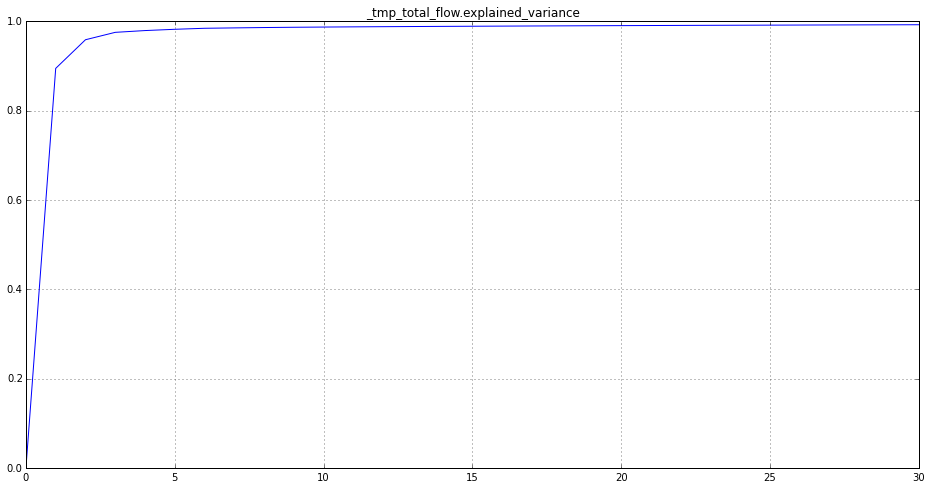

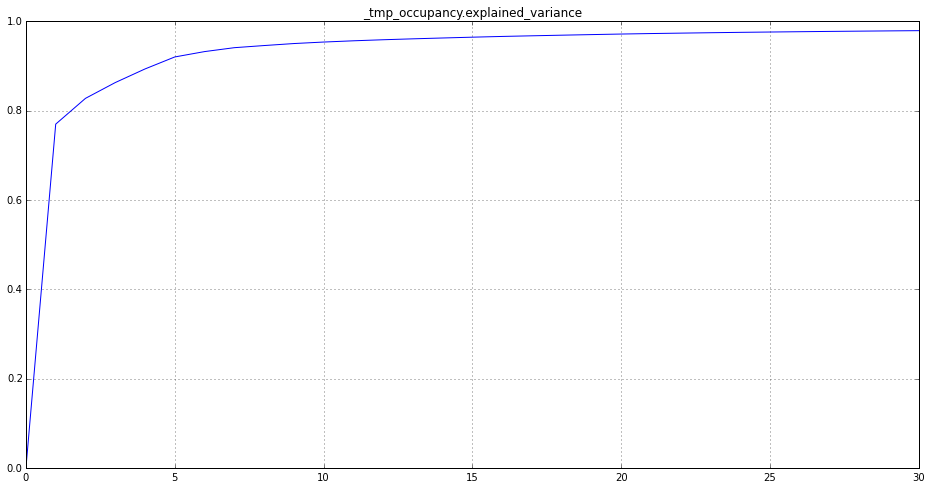

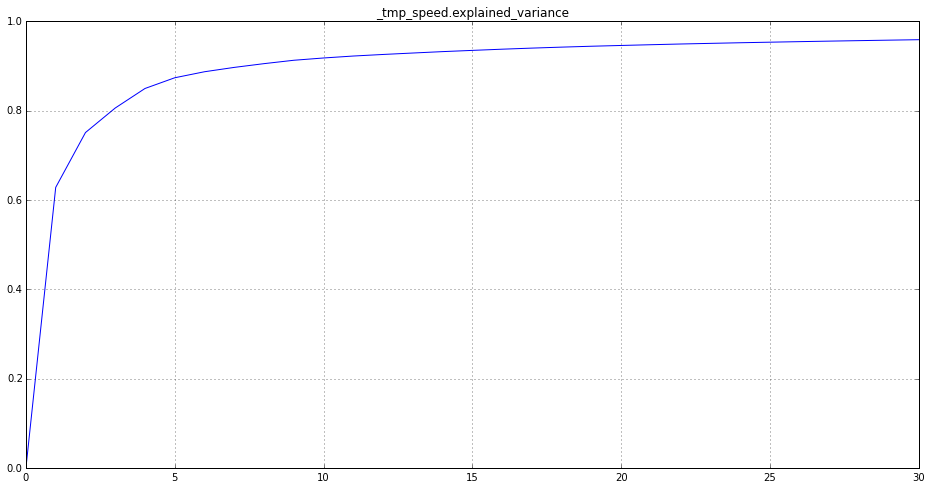

In [6]:
k= 30

for p in m_file_prefixes:
    fig, ax= plt.subplots(figsize=(16,8))
    m_filename= p + 'eigenvalues.01_2010.csv'
    m_eig_values= pd.read_csv(m_filename, header=None).values[0]
    #
    m_plot_arr = ([0, ] + list(np.cumsum(m_eig_values[:k])))
    print(m_plot_arr)
    ax.plot(m_plot_arr)
    #
    m_title= p.replace('/', '_') + 'explained_variance'
    ax.set_title(m_title)
    ax.grid()
    #
    m_output_filename= p + 'explained_variance.pdf'
    fig.savefig(m_output_filename)

# Top 10 Eigenvectors

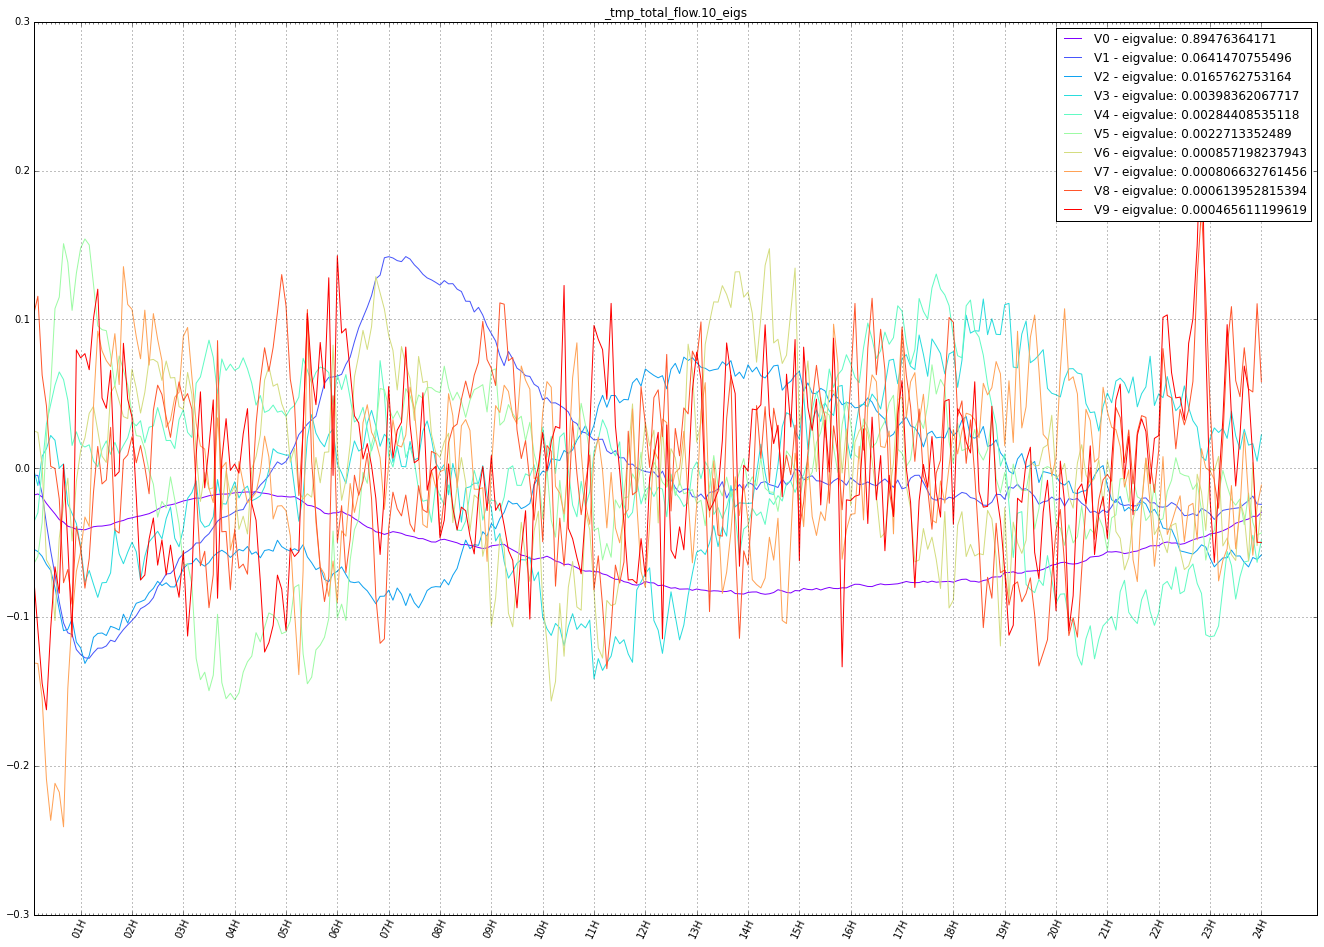

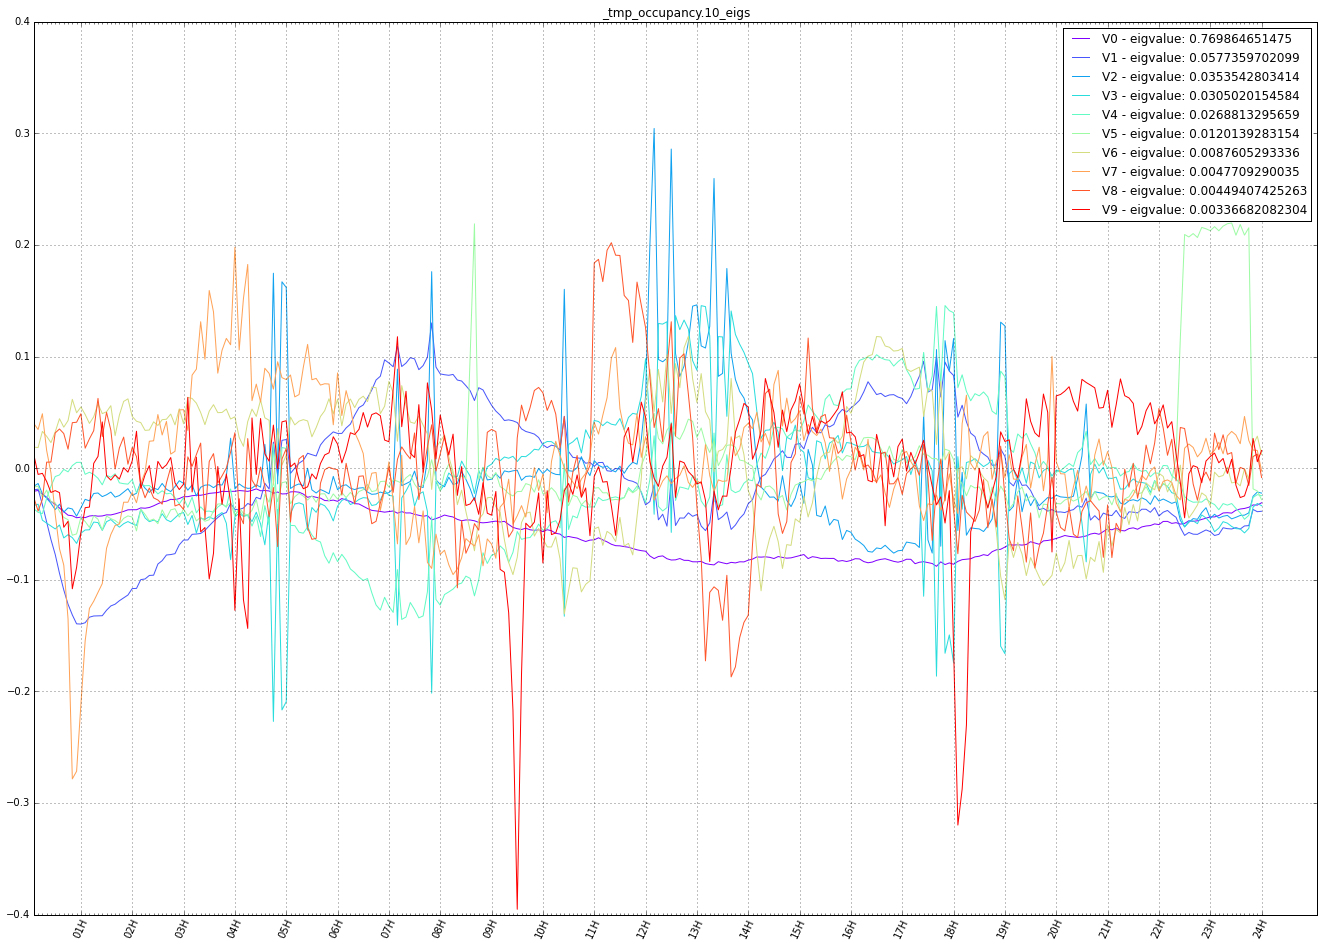

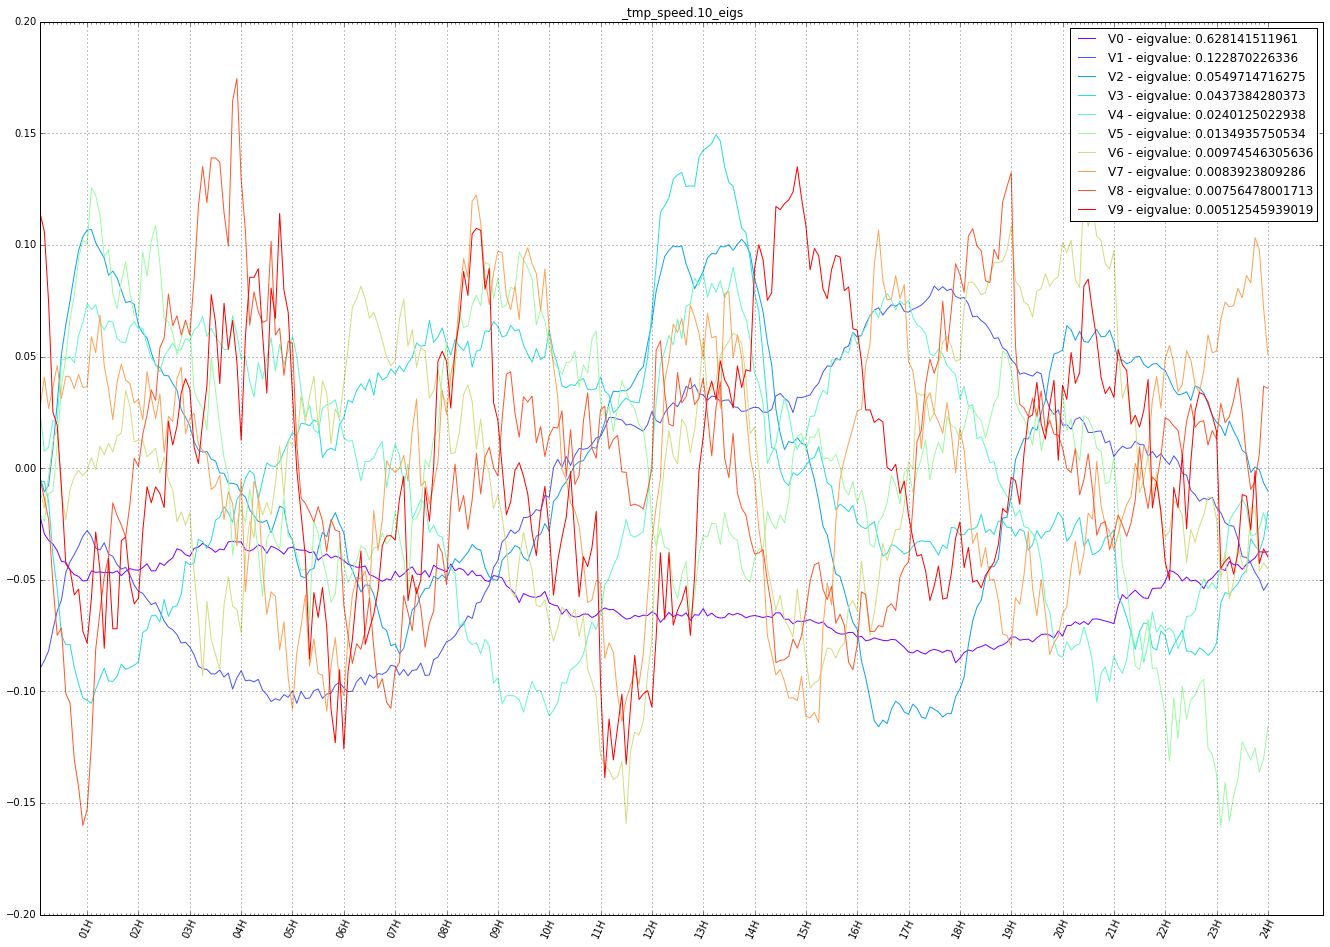

In [7]:
from matplotlib.pyplot import cm

n= 10
for p in m_file_prefixes:
    m_filename= p + 'eigenvectors.01_2010.csv'
    m_eigs= pd.read_csv(m_filename, header=None).values
    m_eigs_t= m_eigs.T
    #
    m_filename= p + 'eigenvalues.01_2010.csv'
    m_eig_values= pd.read_csv(m_filename, header=None).values[0]
    #
    colors=cm.rainbow(np.linspace(0,1,n))

    width= 23
    height= 16
    fig, ax= plt.subplots(figsize=(width,height))
    l_x= [i for i in xrange(shape(m_eigs_t)[1])]
    for i in xrange(n):
        l_y= m_eigs_t[i]
        m_eig_value= m_eig_values[i]
        m_label= 'V{} - eigvalue: {}'.format(i, m_eig_value)
        ax.plot(l_x, l_y, color=colors[i], label=m_label)
    ax.legend()
    #
    m_title= p.replace('/', '_') + '10_eigs'
    ax.set_title(m_title)
    #
    set_xaxis(ax, shape(m_eigs_t)[1])
    #
    m_output_filename= p + '10_eigs.pdf'
    fig.savefig(m_output_filename)

# Reconstruction on Top Eigenvectors

In [8]:
def get_reconstruction(eigenvectors, Mean, x, k):
    # Compute the projection of the data on the top k eigen-vectors
    U = eigenvectors[:k]
    #
    Eig = np.matrix(U.T)
    matrix = np.matrix(x) - Mean
    matrix[np.isnan(matrix)] = 0
    m_projection = matrix * Eig;
    #
    rec = np.array(m_projection * Eig.transpose() + Mean)
    #rec= Eig*m_projection.transpose()+Mean[:,np.newaxis]
    rec = np.ravel(rec)
    return (x, rec)

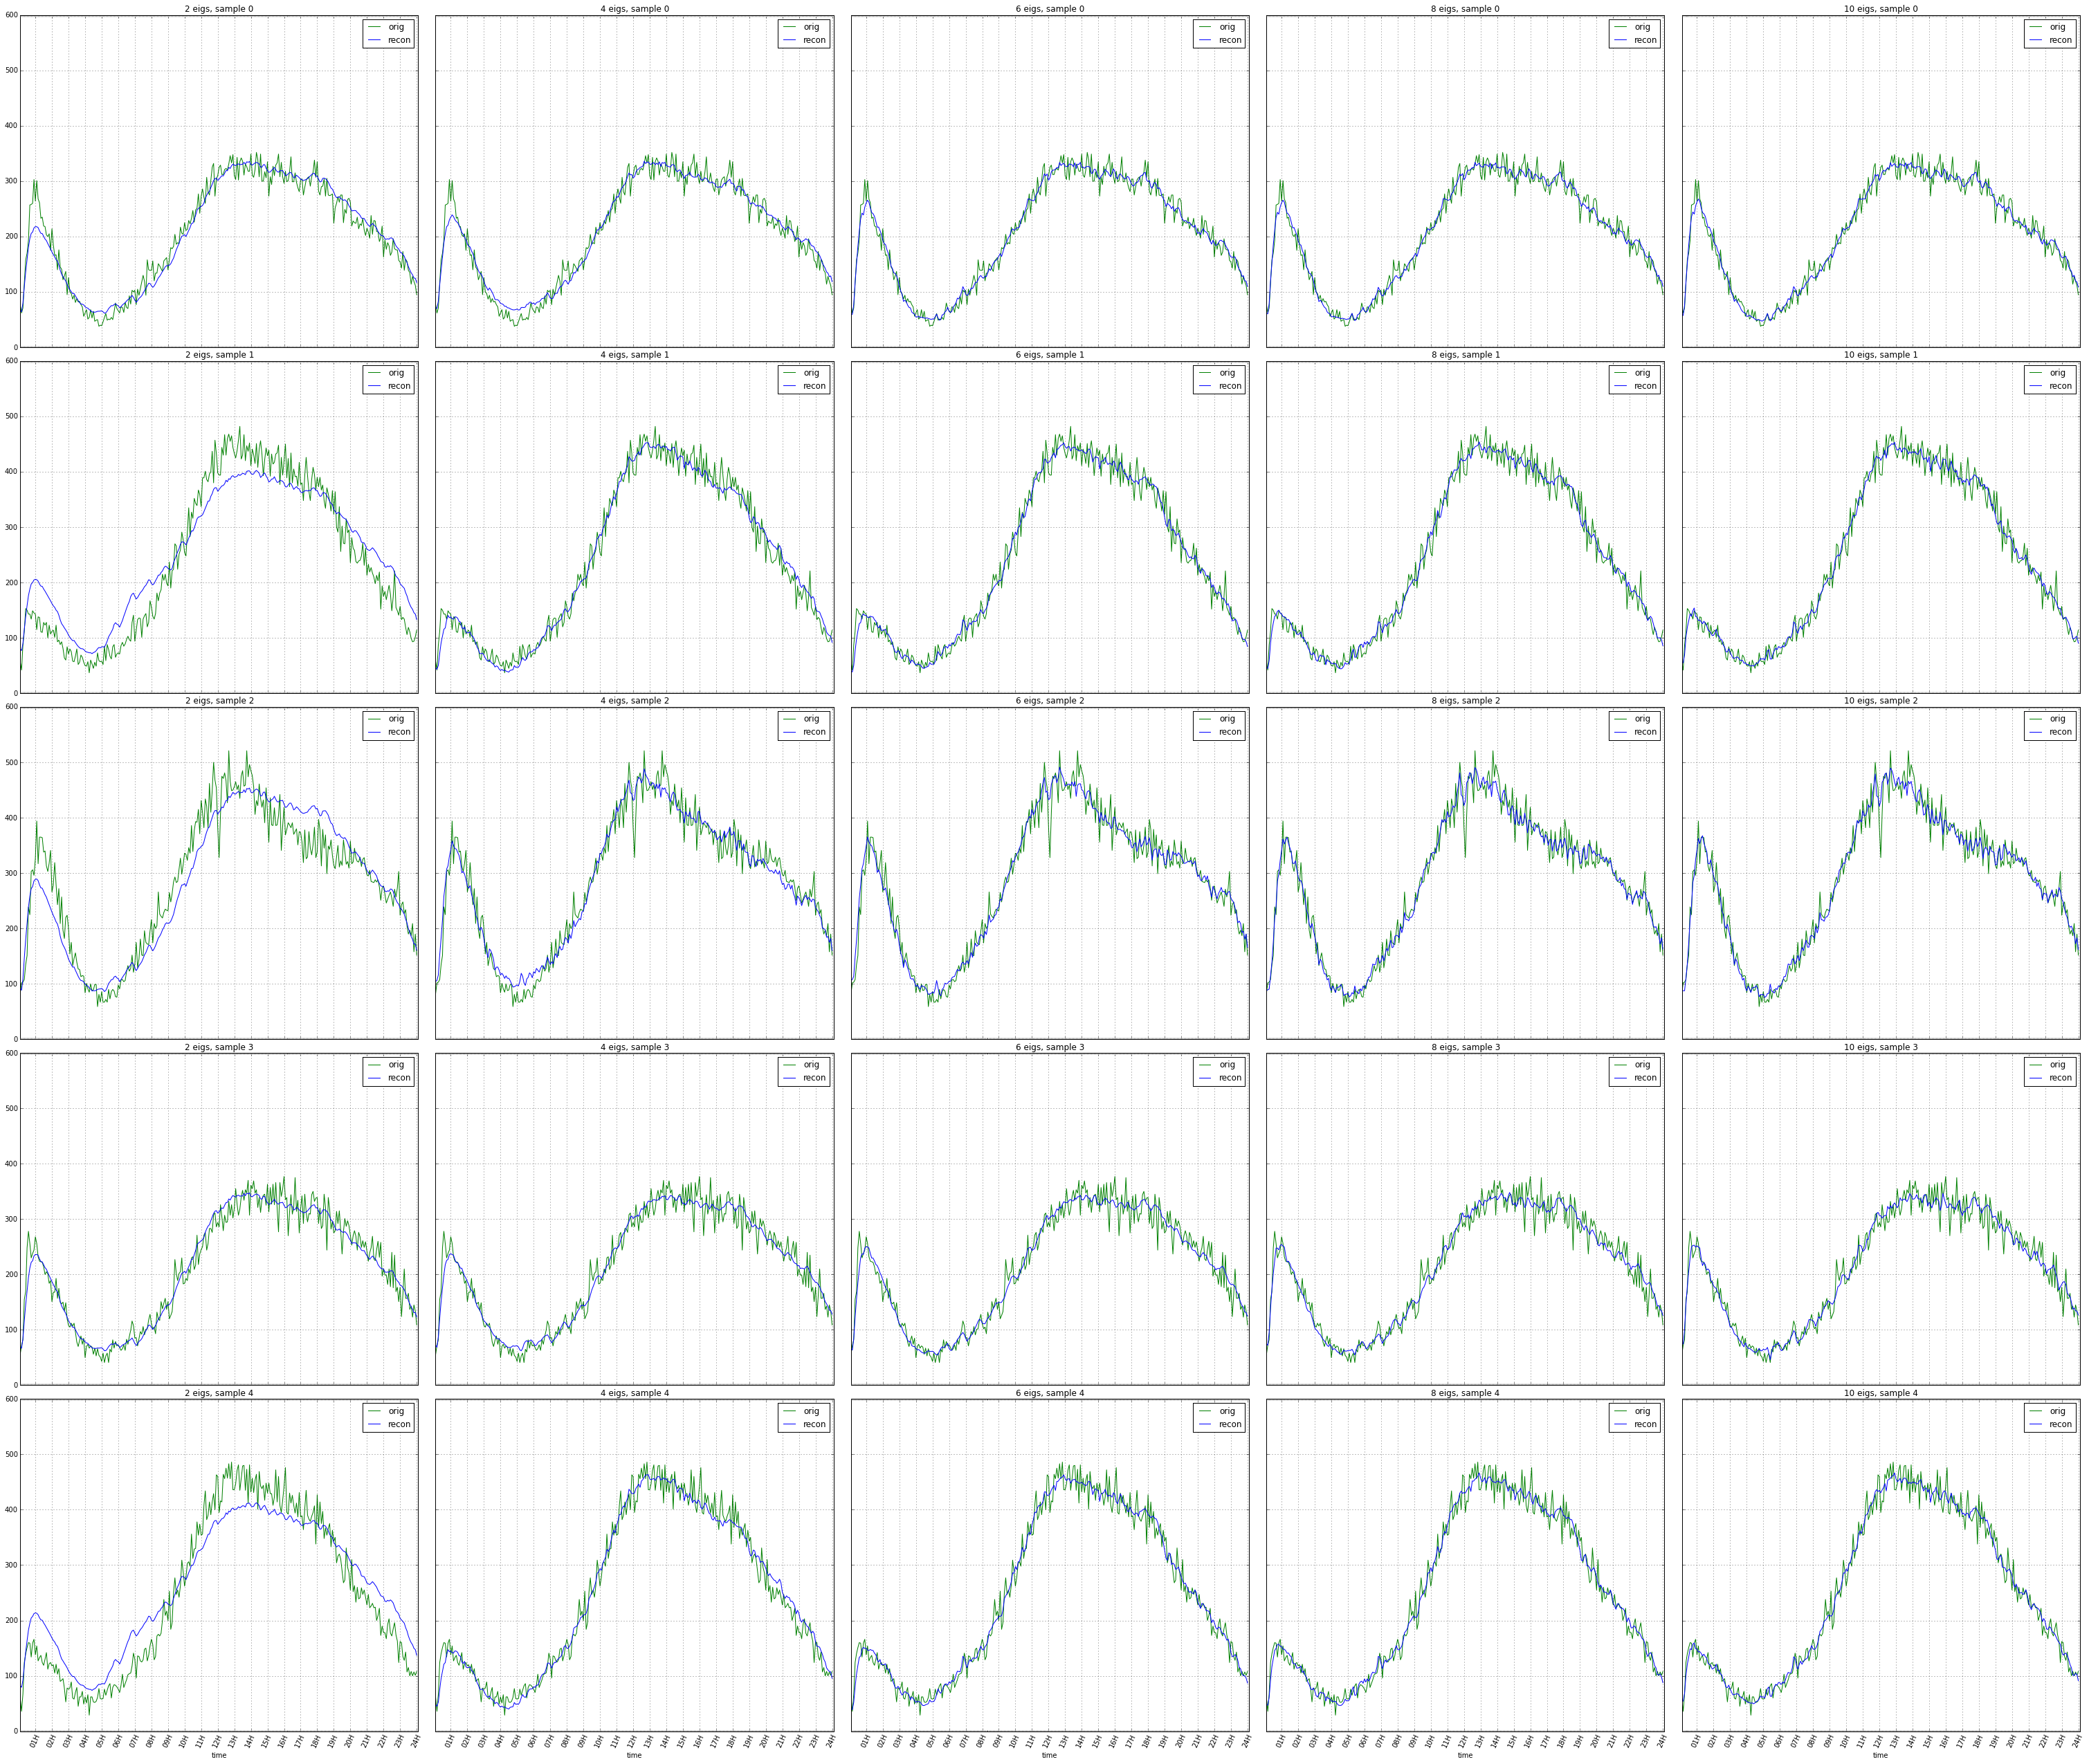

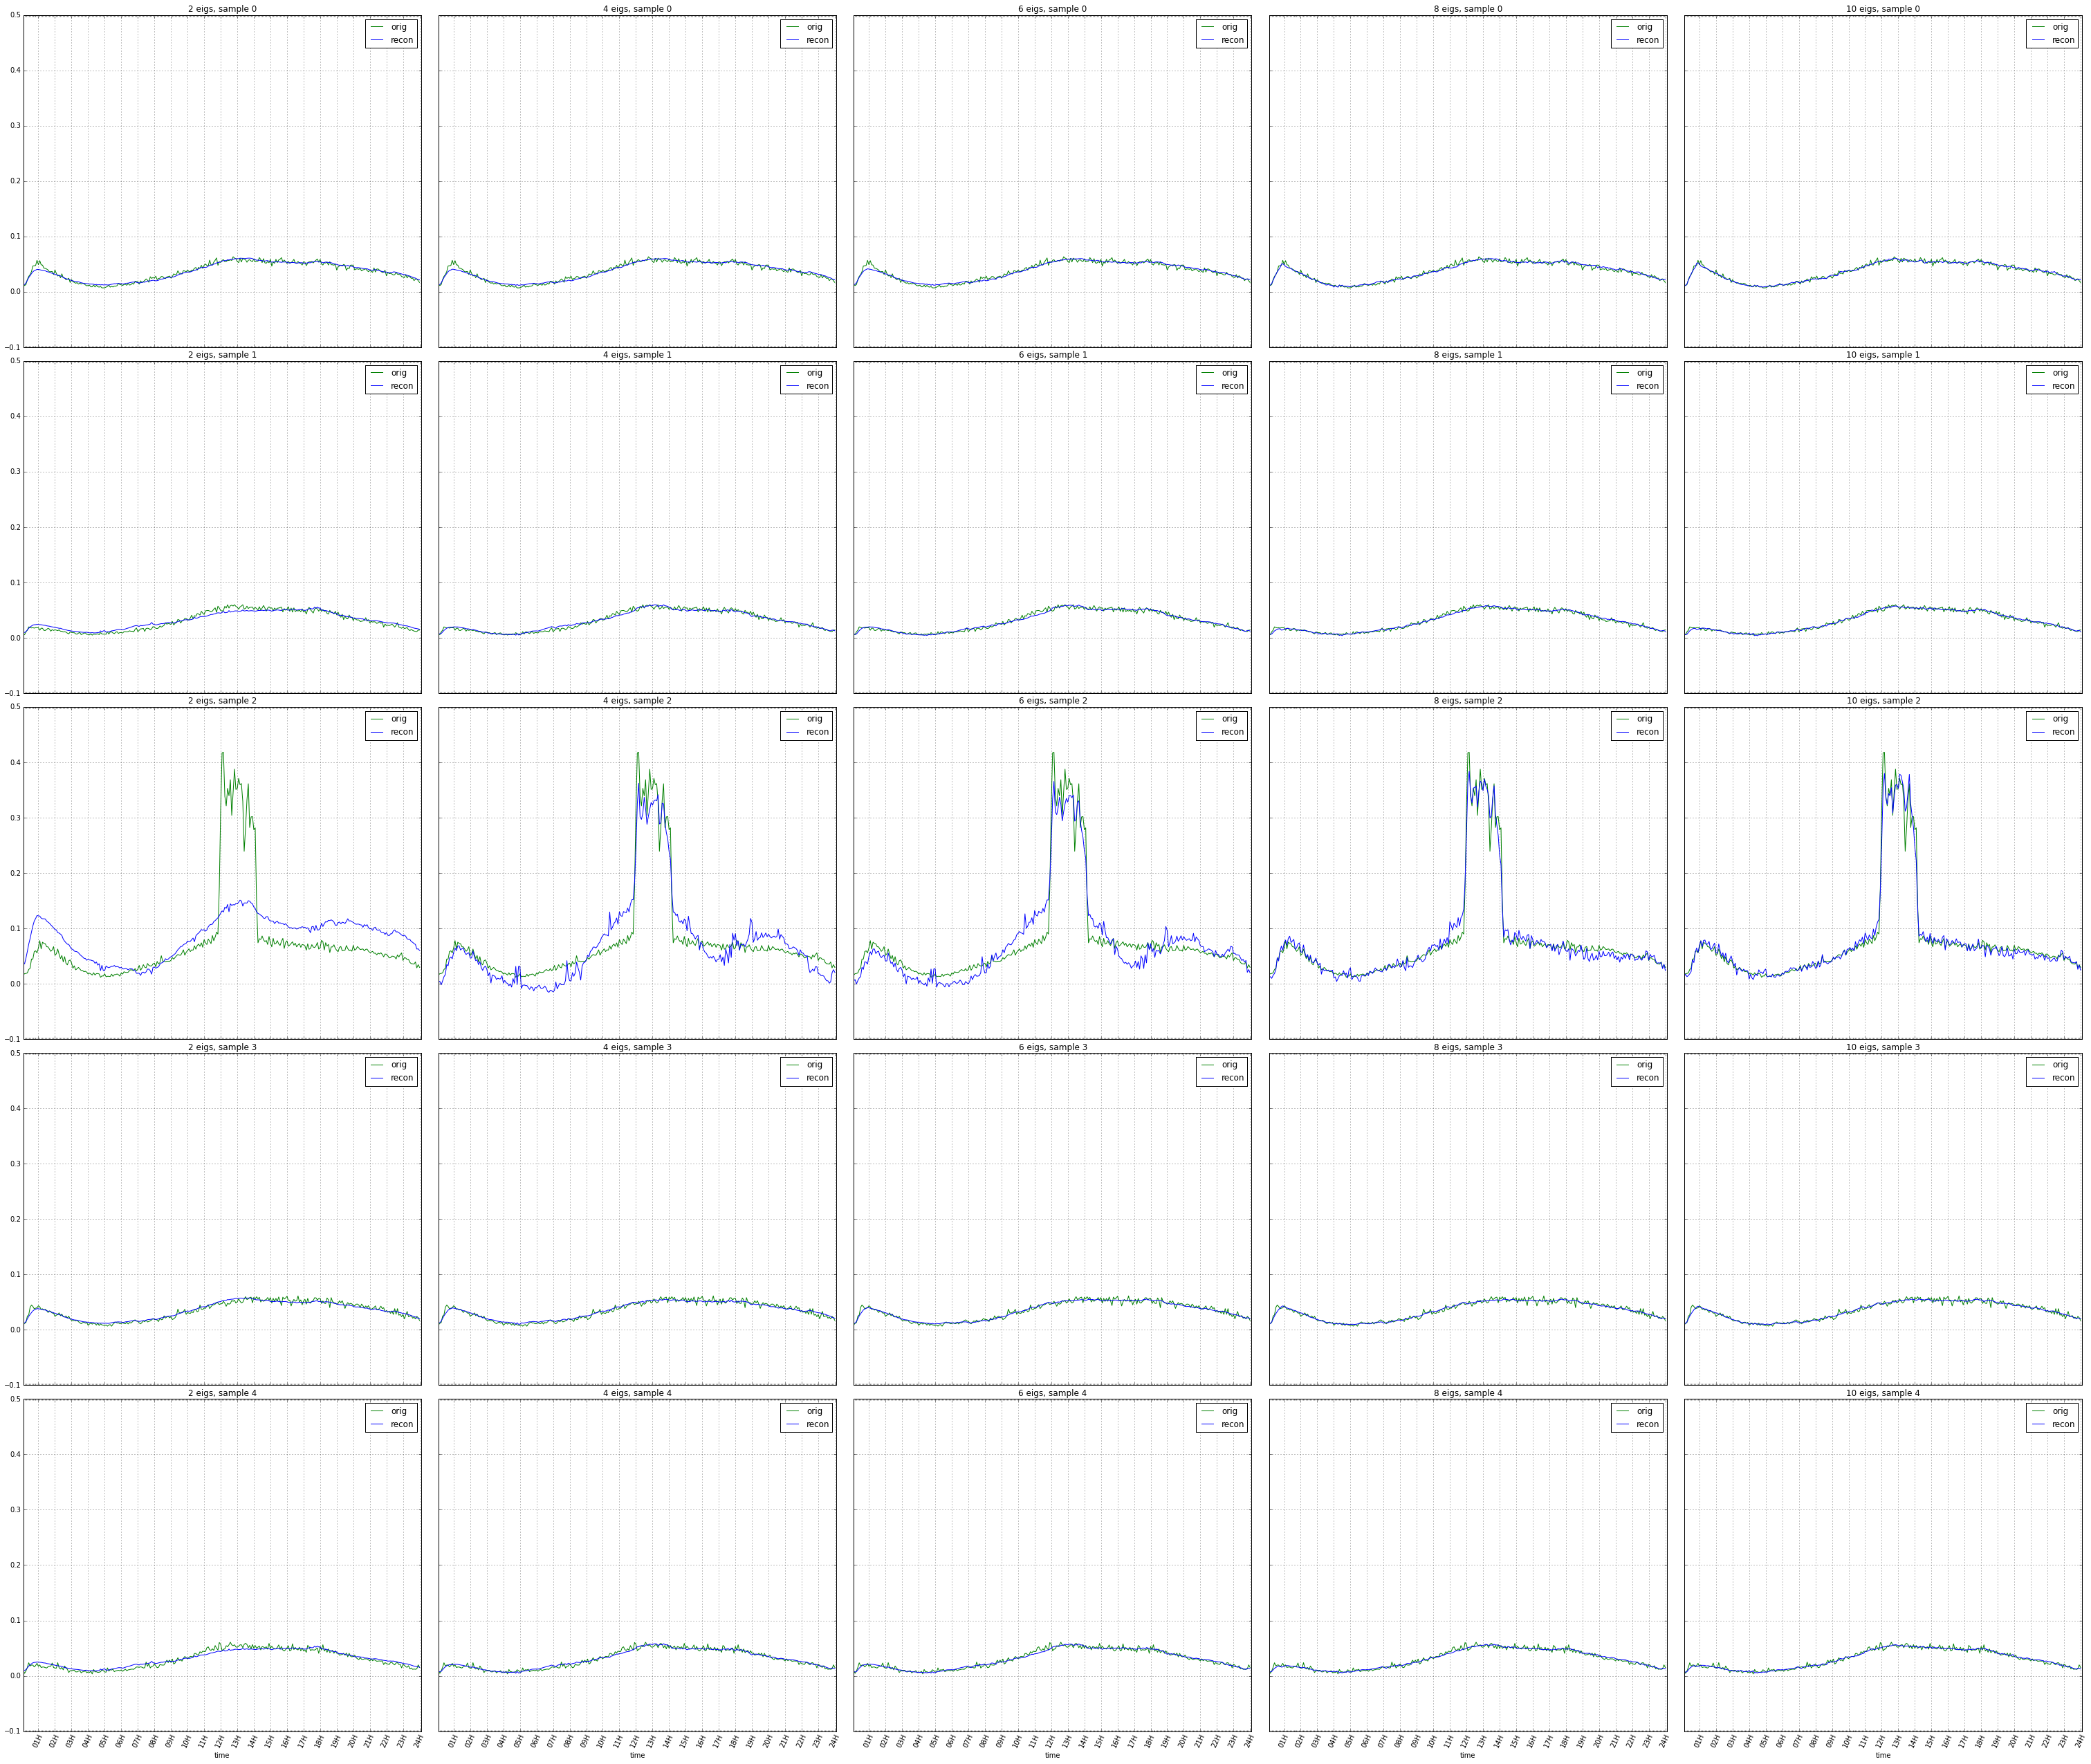

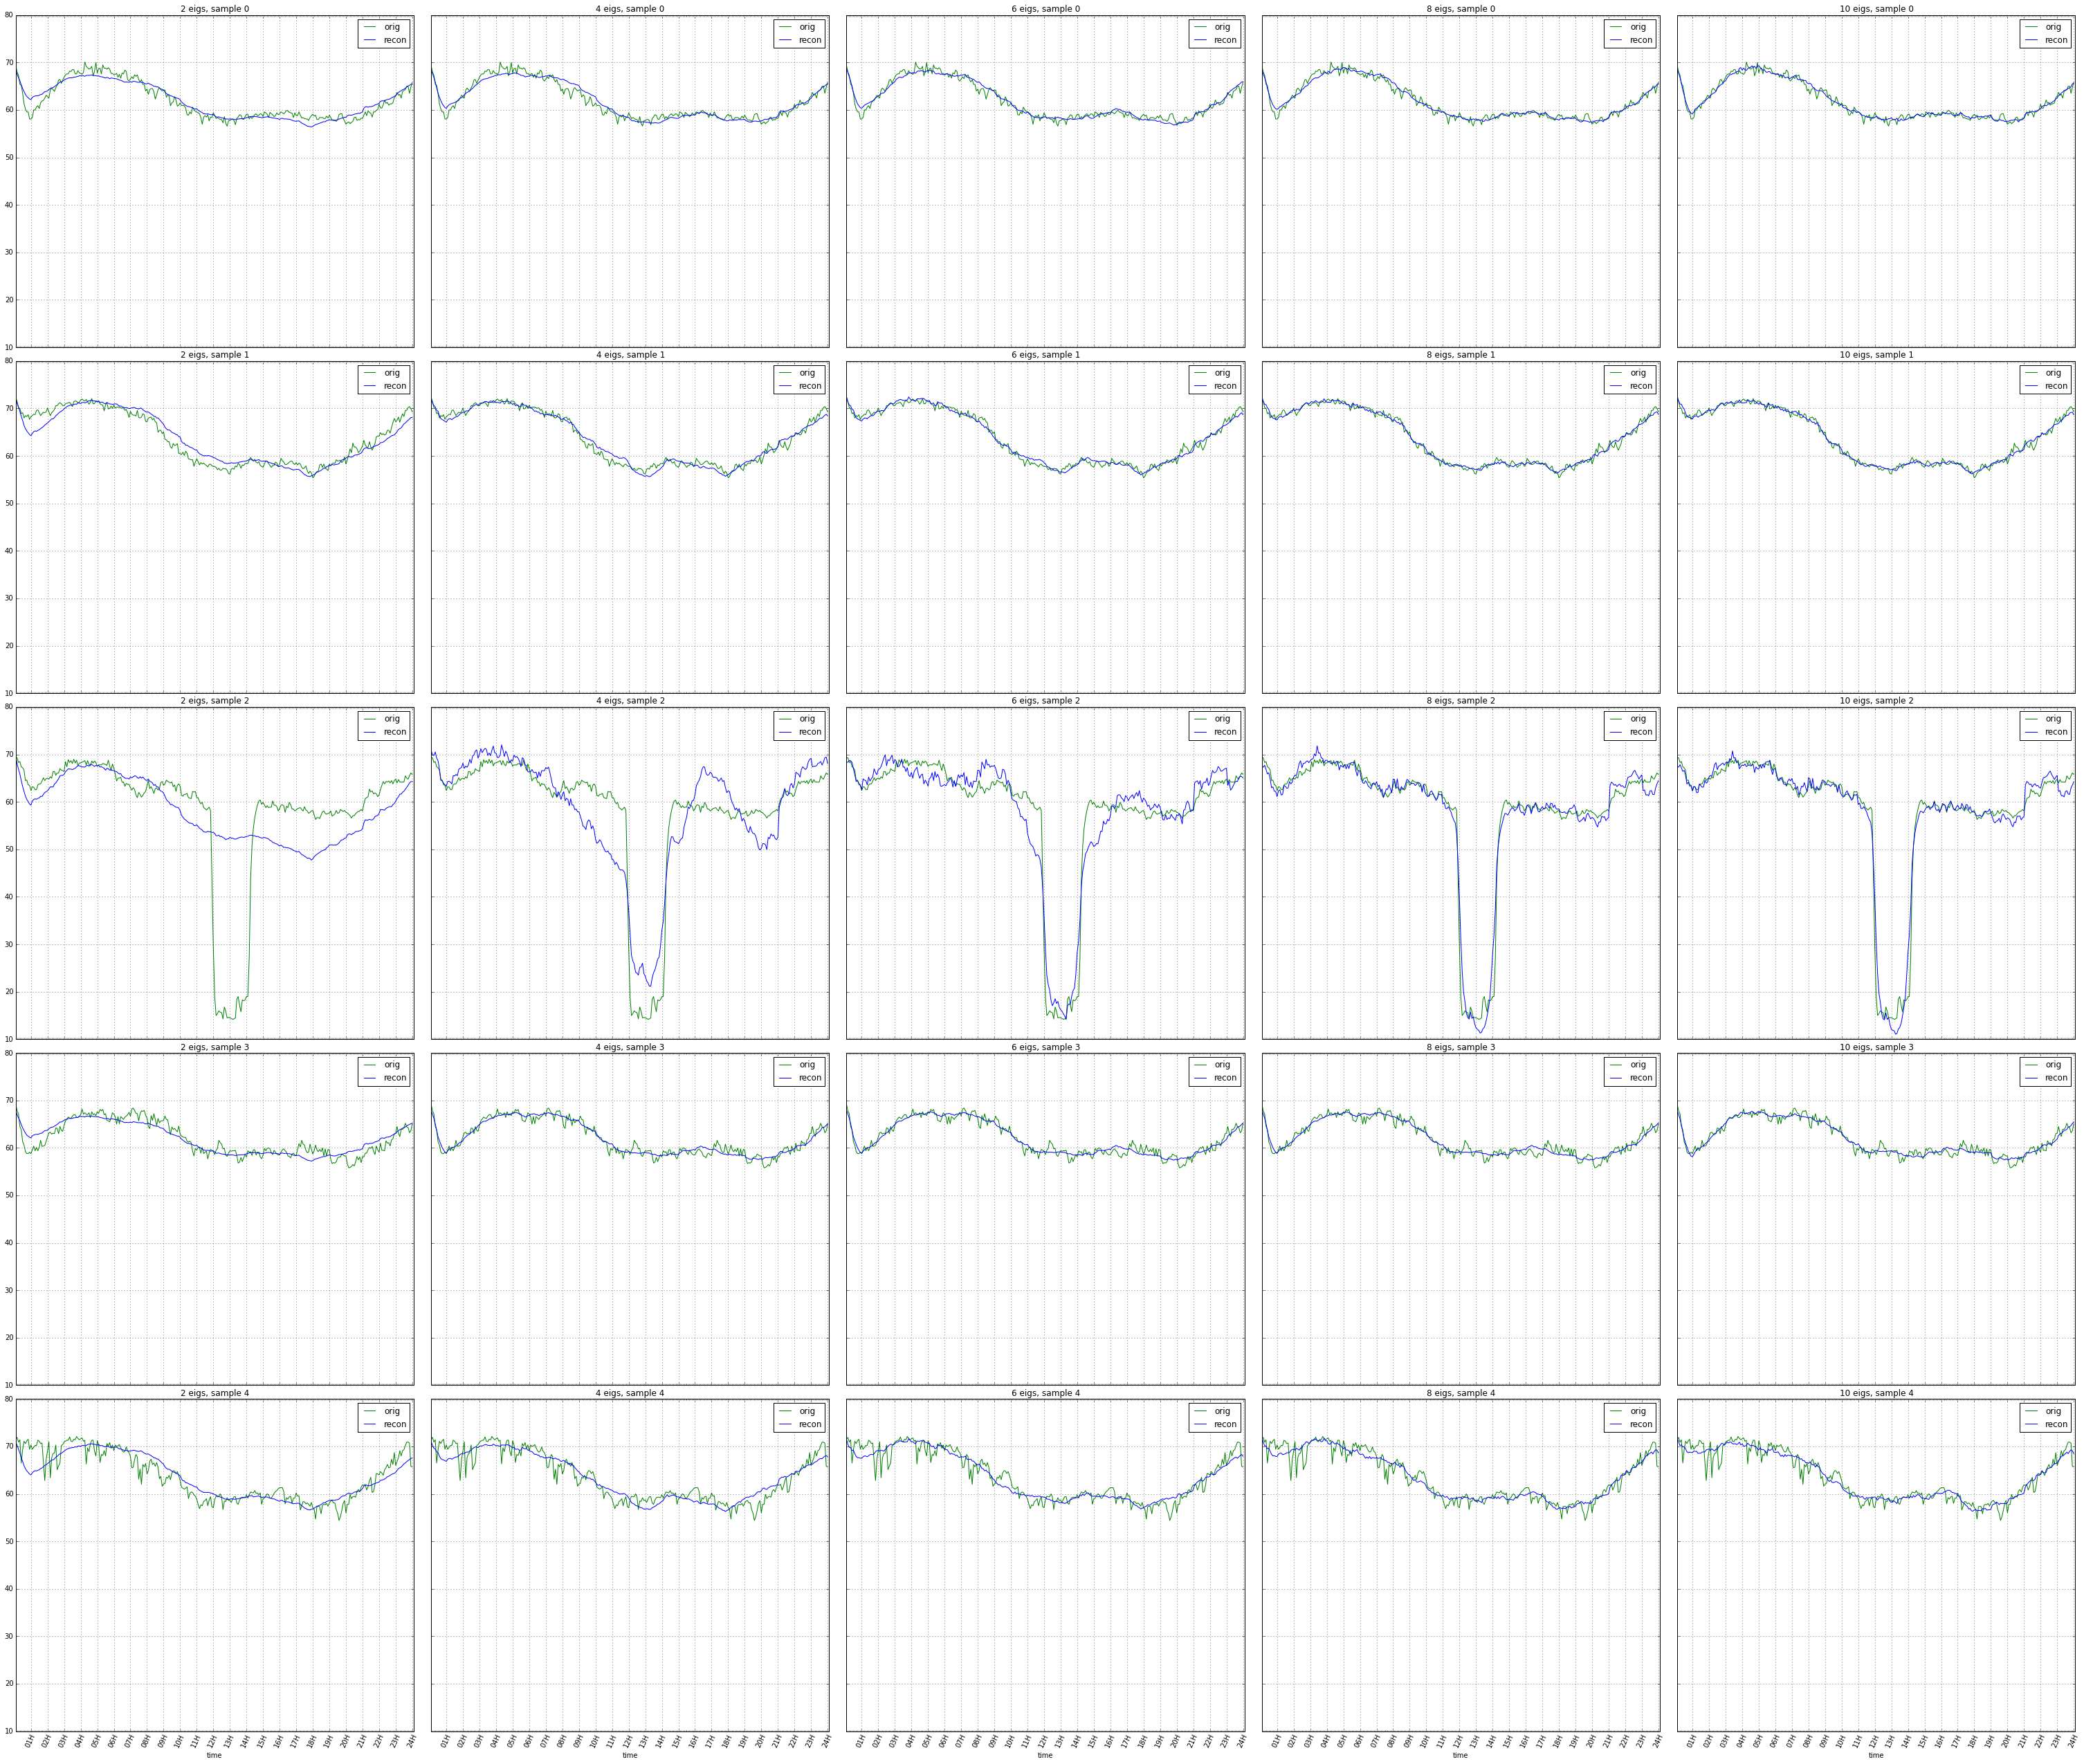

In [9]:
ks = [2, 4, 6, 8, 10]
rows= 5
columns= len(ks)

for p in m_file_prefixes:
    m_filename= p + 'eigenvectors.01_2010.csv'
    m_eigs= pd.read_csv(m_filename, header=None).values
    m_eigs_t= m_eigs.T
    
    m_filename= p + 'mean_vector.01_2010.csv'
    m_mean_vector= pd.read_csv(m_filename, header=None).values[0]
    
    m_filename= p + 'samples.01_2010.csv'
    m_samples= pd.read_csv(m_filename, header=None).values
    
    fig, axes = plt.subplots(nrows=rows, ncols=columns, sharex=True, sharey=True, figsize=(42, 35))
    plt.tight_layout()
    for row in xrange(rows):
        x = m_samples[row]
        for col in xrange(columns):
            k= ks[col]
            m_rec_struct = get_reconstruction(m_eigs_t, m_mean_vector, x, k)
            m_orig_x = m_rec_struct[0]
            m_rec = m_rec_struct[1]

            ax = axes[row, col]
            ax.plot(m_orig_x, c='g', label='orig')
            ax.plot(m_rec, c='b', label='recon')
            ax.set_xlim([0, len(m_orig_x)])
            ax.set_title("{} eigs, sample {}".format(k, row))
            ax.legend()
            #
            set_xaxis(ax, shape(m_eigs_t)[1])
            #
            if row == (rows - 1):
                ax.set_xlabel("time")
    m_output_filename= p + 'reconstruction.pdf'
    fig.savefig(m_output_filename)